Meiosis pairing: MSCD and average linkages per chromosome
-------------------------------------------------------------------------

In [571]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import wlcstat.wlcave as wlcave
import wlcstat.wlcgreen as wlcgreen
import wlcstat.wlcstruc as wlcstruc
import wlcstat.poly_dyn as poly_dyn
import wlcstat.poly_confine as poly_confine

import pandas as pd

from pathlib import Path
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis = cm.get_cmap('viridis', 12)

output_folder = Path('meiosis-figures/')

Show MSCD for 5 sample cells (URA3, chr. V, $b = 0.015 \mu m$)

In [2]:
chr_size_bp = 576874
linker_length = 15
nucleo_length = 146
d0 = 3.487
locus_position_bp = np.mean([116167, 116970])
kuhn_length = 0.015  # Kuhn length in um
nuc_radius = 1.3

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
label_loc_um = locus_position_kuhn * kuhn_length
total_length_um = total_length_kuhn * kuhn_length

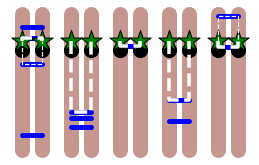

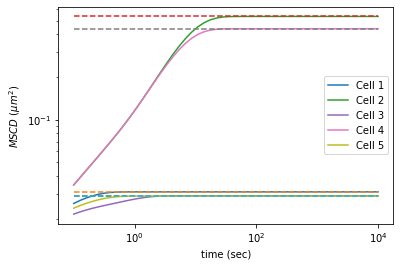

In [3]:
mu = 2
cells = [poly_dyn.generate_example_cell(mu, total_length_um) for i in range(5)]
ax, all_closest_links = poly_dyn.draw_cells(cells)

plt.show()
t = np.logspace(-1,4,50).astype(float)
plt.figure()

for i, linkages in enumerate(cells):
    mscd = poly_dyn.model_mscd(t,linkages, label_loc_um, 
            total_length_um,
            nuc_radius, kuhn_length, d0, num_modes=10000)
    mscd_plateau_cell = poly_dyn.model_plateau(
                linkages, label_loc_um, total_length_um, nuc_radius, kuhn_length)
    plt.loglog(t, mscd, label = 'Cell ' + str(i+1))
    plt.loglog(t, mscd_plateau_cell + 0*t,'--')
    
plt.legend()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
plt.xlabel(r'time (sec)')
plt.ylabel(r'$MSCD$ ($\mu m^{2}$)')
plt.show()

In [4]:
cells = np.array([np.array([ 2.80260366,  8.01409611, 16.15546293]),
       np.array([ 2.44545907, 10.10344069, 11.28044254]), np.array([7.205263]),
       np.array([17.11988376]), np.array([])], dtype=object)

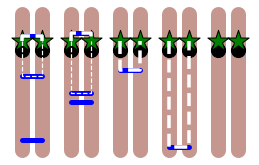

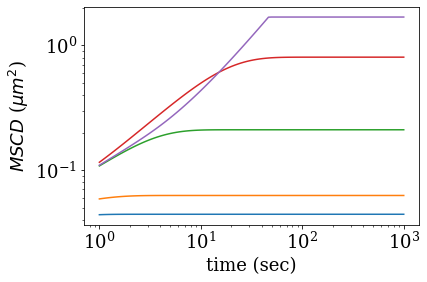

In [5]:
ax, all_closest_links = poly_dyn.draw_cells(cells)

plt.show()
t = np.logspace(0,3,100).astype(float)
plt.figure()

for i, linkages in enumerate(cells):
    mscd = poly_dyn.model_mscd(t,linkages, label_loc_um, 
            total_length_um,
            nuc_radius, kuhn_length, d0, num_modes=10000)
    plt.loglog(t, mscd, label = 'Cell ' + str(i+1))
#plt.legend()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
plt.xlabel(r'time (sec)')
plt.ylabel(r'$MSCD$ ($\mu m^{2}$)')
plt.show()

MSCD versus time for varying $\lambda$ (URA3, chr. V, $b = 0.015 \mu m$)

In [9]:
chr_size_bp = 576874
linker_length = 15
nucleo_length = 146
d0 = 3.487
locus_position_bp = np.mean([116167, 116970])
kuhn_length = 0.015  # Kuhn length in um
nuc_radius = 1.3

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
label_loc_um = locus_position_kuhn * kuhn_length
total_length_um = total_length_kuhn * kuhn_length

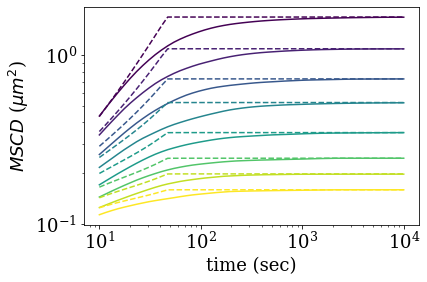

In [10]:
mus = np.linspace(0,4,8)
num_cells=1000
t = np.logspace(1,4,50).astype(float)

for i_mu in range(len(mus)):
    mu = mus[i_mu]
    mscd = np.zeros_like(t).astype(float)
    mscd_exp_d = np.zeros_like(t).astype(float)
    for i_cell in range(num_cells):
        linkages = poly_dyn.generate_example_cell(mu, total_length_um)
        d_cell = d0 * np.random.exponential()
        mscd += 1 / num_cells * poly_dyn.model_mscd(
            t, linkages, label_loc_um, 
            total_length_um,
            nuc_radius, kuhn_length, d0, num_modes=10000)
        mscd_exp_d += 1 / num_cells * poly_dyn.model_mscd(
            t, linkages, label_loc_um, 
            total_length_um,
            nuc_radius, kuhn_length, d_cell, num_modes=10000)

    color_ratio = i_mu / (len(mus)-1)
    plt.loglog(t, mscd, '--', c=viridis(color_ratio))
    plt.loglog(t, mscd_exp_d, '-', c=viridis(color_ratio))

ax.set_xlim([10, 10**4])
ax.set_ylim([10 ** -1, 2])
#cb = plt.colorbar()
#cb.set_label('Average linkages per chromosome')
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
plt.xlabel(r'time (sec)')
plt.ylabel(r'$MSCD$ ($\mu m^{2}$)')
plt.show()

MSCD versus time for varying $\lambda$ (URA3, chr. V, $b = 0.106 \mu m$)

In [11]:
chr_size_bp = 576874
linker_length = 15
nucleo_length = 146
d0 = 3.487
locus_position_bp = np.mean([116167, 116970])
kuhn_length = 0.106  # Kuhn length in um
nuc_radius = 1.3

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
label_loc_um = locus_position_kuhn * kuhn_length
total_length_um = total_length_kuhn * kuhn_length

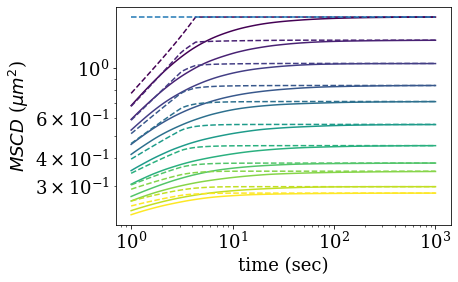

In [12]:
mus = np.linspace(0,10,11)
num_cells=1000
t = np.logspace(0,3,100).astype(float)

for i_mu in range(len(mus)):
    mu = mus[i_mu]
    mscd = np.zeros_like(t).astype(float)
    mscd_exp_d = np.zeros_like(t).astype(float)
    for i_cell in range(num_cells):
        linkages = poly_dyn.generate_example_cell(mu, total_length_um)
        d_cell = d0 * np.random.exponential()
        mscd += 1 / num_cells * poly_dyn.model_mscd(
            t, linkages, label_loc_um, 
            total_length_um,
            nuc_radius, kuhn_length, d0, num_modes=10000)
        mscd_exp_d += 1 / num_cells * poly_dyn.model_mscd(
            t, linkages, label_loc_um, 
            total_length_um,
            nuc_radius, kuhn_length, d_cell, num_modes=10000)

    color_ratio = i_mu / (len(mus)-1)
    plt.loglog(t, mscd, '--', c=viridis(color_ratio))
    plt.loglog(t, mscd_exp_d, '-', c=viridis(color_ratio))

plt.loglog(t, 0*t + nuc_radius ** 2, '--')
    
#cb = plt.colorbar()
#cb.set_label('Average linkages per chromosome')
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
plt.xlabel(r'time (sec)')
plt.ylabel(r'$MSCD$ ($\mu m^{2}$)')
plt.show()

In [13]:
kuhn_length

0.106

Evaluation of the MSCD plateau versus the number of linkages (URA3, chr. V, $b = 0.015 \mu m$)

In [14]:
chr_size_bp = 576874
linker_length = 15
nucleo_length = 146
d0 = 3.487
locus_position_bp = np.mean([116167, 116970])
kuhn_length = 0.015  # Kuhn length in um
nuc_radius = 1.3

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
label_loc_um = locus_position_kuhn * kuhn_length
total_length_um = total_length_kuhn * kuhn_length

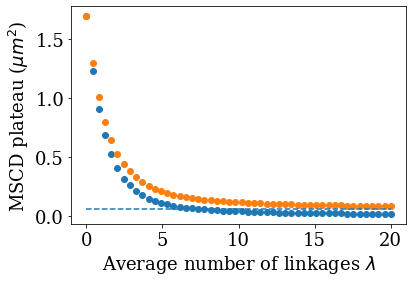

In [15]:
mus = np.linspace(0, 20, 50)
N_cells_vector = np.logspace(5,5,1).astype(int)
radius_sq_cutoff = 0.250 ** 2

plt.figure()
#ax.set_prop_cycle(color=['#aec7e8'])

for i_sample in range(len(N_cells_vector)):
    N_cells = N_cells_vector[i_sample]
    theory_plateaus = np.zeros_like(mus)
    theory_plateaus_biased = np.zeros_like(mus)
    for i, mu in enumerate(mus):
        N_cells_biased = 0
        for j in range(N_cells):
            cell = poly_dyn.generate_example_cell(mu, total_length_um)
            mscd_plateau_cell = poly_dyn.model_plateau(
                cell, label_loc_um, total_length_um, nuc_radius, kuhn_length)
            theory_plateaus[i] += (1 / N_cells) * mscd_plateau_cell
            if mscd_plateau_cell > radius_sq_cutoff:
                N_cells_biased += 1
                theory_plateaus_biased[i] += mscd_plateau_cell
        theory_plateaus_biased[i] /= N_cells_biased
    plt.scatter(mus, theory_plateaus)
    plt.scatter(mus, theory_plateaus_biased)

plt.plot(mus,0*mus + radius_sq_cutoff, '--')

plt.xlabel('Average number of linkages $\lambda$')
plt.ylabel('MSCD plateau ($\mu{}m^2$)') 

plt.show()

In [16]:
plateau_exp_ura = np.array([1.041056, 1.260354, 1.439587, 1.480568, 1.351417, 1.097409])
plateau_exp_spo = np.array([0.999832, 1.173121, 1.349847, 1.494605, 1.509391, 1.314366, 1.441702])
mufit_ura = np.interp(plateau_exp_ura, np.flipud(theory_plateaus_biased), np.flipud(mus))
mufit_spo = np.interp(plateau_exp_spo, np.flipud(theory_plateaus_biased), np.flipud(mus))

In [17]:
mufit_ura

array([0.76365511, 0.45310417, 0.25686519, 0.21482827, 0.347307  ,
       0.68385285])

In [52]:
total_length_um

17.162001500000002

Evaluation of the MSCD plateau versus the number of linkages (URA3, chr. V, $b = 0.106 \mu m$)

In [97]:
chr_size_bp = 576874
linker_length = 30
nucleo_length = 146
d0 = 3.487
locus_position_bp = np.mean([116167, 116970])
kuhn_length = 0.20  # Kuhn length in um
nuc_radius = 1.3

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
label_loc_um = locus_position_kuhn * kuhn_length
total_length_um = total_length_kuhn * kuhn_length

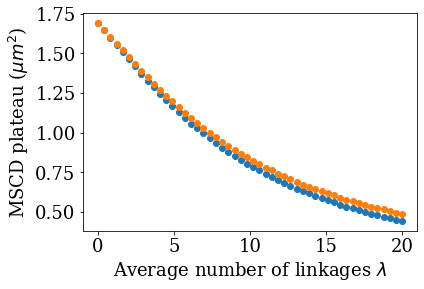

In [98]:
mus = np.linspace(0, 20, 50)
N_cells_vector = np.logspace(5,5,1).astype(int)
radius_sq_cutoff = 0.250 ** 2

plt.figure()
#ax.set_prop_cycle(color=['#aec7e8'])

for i_sample in range(len(N_cells_vector)):
    N_cells = N_cells_vector[i_sample]
    theory_plateaus = np.zeros_like(mus)
    theory_plateaus_biased = np.zeros_like(mus)
    for i, mu in enumerate(mus):
        N_cells_biased = 0
        for j in range(N_cells):
            cell = poly_dyn.generate_example_cell(mu, total_length_um)
            mscd_plateau_cell = poly_dyn.model_plateau(
                cell, label_loc_um, total_length_um, nuc_radius, kuhn_length)
            theory_plateaus[i] += (1 / N_cells) * mscd_plateau_cell
            if mscd_plateau_cell > radius_sq_cutoff:
                N_cells_biased += 1
                theory_plateaus_biased[i] += mscd_plateau_cell
        theory_plateaus_biased[i] /= N_cells_biased
    plt.scatter(mus, theory_plateaus)
    plt.scatter(mus, theory_plateaus_biased)

plt.xlabel('Average number of linkages $\lambda$')
plt.ylabel('MSCD plateau ($\mu{}m^2$)') 

plt.show()

In [99]:
plateau_exp_ura = np.array([1.041056, 1.260354, 1.439587, 1.480568, 1.351417, 1.097409])
plateau_exp_spo = np.array([0.999832, 1.173121, 1.349847, 1.494605, 1.509391, 1.314366, 1.441702])
mufit_ura = np.interp(plateau_exp_ura, np.flipud(theory_plateaus_biased), np.flipud(mus))
mufit_spo = np.interp(plateau_exp_spo, np.flipud(theory_plateaus_biased), np.flipud(mus))

In [100]:
print(mufit_ura)
print(mufit_spo)

[6.78596964 4.15618905 2.40299641 2.00607144 3.23425324 6.0348429 ]
[7.31555123 5.16955675 3.24943413 1.87298381 1.73279476 3.61656241
 2.38246895]


Calculate the MSCD plateau versus the number of linkages over a range of $\lambda$ and linker length

In [175]:
chr_size_bp = 576874
nucleo_length = 146
locus_position_bp = np.mean([116167, 116970])
nuc_radius = 1.3

mus = np.linspace(0, 20, 101)
n_cells = 10000
radius_sq_cutoff = 0.250 ** 2

kuhn_length_0 = 0.015
kuhn_length_f = 0.450
n_kuhn = 30
kuhn_length_series = np.linspace(kuhn_length_0, kuhn_length_f, n_kuhn)

linker_length_0 = 15
linker_length_f = 450
n_linker = 30
linker_length_series = np.linspace(linker_length_0, linker_length_f, n_linker)


mscd = np.array([])
mscd_biased = np.array([])

for i_kuhn in range(n_kuhn):
    kuhn_length = kuhn_length_series[i_kuhn]

    for i_linker in range(n_linker):
        linker_length = linker_length_series[i_linker]

        chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
        total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
        locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
        label_loc_um = locus_position_kuhn * kuhn_length
        total_length_um = total_length_kuhn * kuhn_length

        theory_plateaus = np.zeros_like(mus)
        theory_plateaus_biased = np.zeros_like(mus)
        for i, mu in enumerate(mus):
            n_cells_biased = 0
            for j in range(n_cells):
                cell = poly_dyn.generate_example_cell(mu, total_length_um)
                mscd_plateau_cell = poly_dyn.model_plateau(
                    cell, label_loc_um, total_length_um, nuc_radius, kuhn_length)
                theory_plateaus[i] += (1 / n_cells) * mscd_plateau_cell
                if mscd_plateau_cell > radius_sq_cutoff:
                    n_cells_biased += 1
                    theory_plateaus_biased[i] += mscd_plateau_cell
            theory_plateaus_biased[i] /= n_cells_biased
        
        mscd = np.append(mscd, theory_plateaus)
        mscd_biased = np.append(mscd_biased, theory_plateaus_biased)
        output_file = 'meiosis-figures/data/mscd_plateau'
#        np.savez(output_file, mscd = mscd, mscd_biased = mscd_biased)

Calculate the MSCD plateau versus the number of linkages over a range of $\lambda$ and linker length with centromere linkage

In [188]:
chr_size_bp = 576874
nucleo_length = 146
locus_position_bp = np.mean([116167, 116970])
cent_position_bp = np.mean([151987,152104])
nuc_radius = 1.3

mus = np.linspace(0, 20, 101)
n_cells = 10000
radius_sq_cutoff = 0.250 ** 2

kuhn_length_0 = 0.015
kuhn_length_f = 0.450
n_kuhn = 30
kuhn_length_series = np.linspace(kuhn_length_0, kuhn_length_f, n_kuhn)

linker_length_0 = 15
linker_length_f = 450
n_linker = 30
linker_length_series = np.linspace(linker_length_0, linker_length_f, n_linker)

mscd = np.array([])
mscd_biased = np.array([])

for i_kuhn in range(n_kuhn):
    kuhn_length = kuhn_length_series[i_kuhn]

    for i_linker in range(n_linker):
        linker_length = linker_length_series[i_linker]

        chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
        total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
        locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
        cent_position_kuhn = total_length_kuhn * cent_position_bp / chr_size_bp
        label_loc_um = locus_position_kuhn * kuhn_length
        cent_loc_um = cent_position_kuhn * kuhn_length
        total_length_um = total_length_kuhn * kuhn_length

        theory_plateaus = np.zeros_like(mus)
        theory_plateaus_biased = np.zeros_like(mus)
        for i, mu in enumerate(mus):
            n_cells_biased = 0
            for j in range(n_cells):
                cell = poly_dyn.generate_example_cell(mu, total_length_um)
                cell = np.sort(np.append(cell, cent_loc_um))
                mscd_plateau_cell = poly_dyn.model_plateau(
                    cell, label_loc_um, total_length_um, nuc_radius, kuhn_length)
                theory_plateaus[i] += (1 / n_cells) * mscd_plateau_cell
                if mscd_plateau_cell > radius_sq_cutoff:
                    n_cells_biased += 1
                    theory_plateaus_biased[i] += mscd_plateau_cell
            theory_plateaus_biased[i] /= n_cells_biased
        
        mscd = np.append(mscd, theory_plateaus)
        mscd_biased = np.append(mscd_biased, theory_plateaus_biased)
        output_file = 'meiosis-figures/data/mscd_plateau_cent'
#        np.savez(output_file, mscd = mscd, mscd_biased = mscd_biased)

Determine the best-fit value of the Kuhn length based on $T_{0}$ plateau values and assuming 15 bp linker length

In [572]:
mscd_exp = np.array([0.999832, 1.173121, 1.349847, 1.494605, 1.509391, 1.314366, 1.441702])
np.sqrt(np.average(mscd_exp[2:8]))
np.sqrt(np.average([1.494605, 1.509391, 1.441702]))

1.2173328769623095

In [ ]:
chr_size_bp = 576874
nucleo_length = 146
locus_position_bp = np.mean([116167, 116970])
cent_position_bp = np.mean([151987,152104])
#nuc_radius = 1.3
nuc_radius = 1.217

mus = np.linspace(0, 20, 101)
n_cells = 100000
radius_sq_cutoff = 0.250 ** 2

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
cent_position_kuhn = total_length_kuhn * cent_position_bp / chr_size_bp
label_loc_um = locus_position_kuhn * kuhn_length
cent_loc_um = cent_position_kuhn * kuhn_length
total_length_um = total_length_kuhn * kuhn_length

print(nuc_radius ** 2)
print(eval_r2_surf(delta, length_kuhn, b, a=1, n_max=1000))

In [559]:
npzfile = np.load('meiosis-figures/data/mscd_plateau_cent' + '.npz')
mscd = npzfile['mscd']
mscd_biased = npzfile['mscd_biased']
plateau_exp_ura = np.array([1.041056, 1.260354, 1.439587, 1.480568, 1.351417, 1.097409])
plateau_exp_spo = np.array([0.999832, 1.173121, 1.349847, 1.494605, 1.509391, 1.314366, 1.441702])

chr_size_bp = 576874
nucleo_length = 146
locus_position_bp = np.mean([116167, 116970])
cent_position_bp = np.mean([151987,152104])
#nuc_radius = 1.3
nuc_radius = 1.217

n_mu = 101
mus = np.linspace(0, 20, n_mu)
n_cells = 10000
radius_sq_cutoff = 0.250 ** 2

kuhn_length_0 = 0.015
kuhn_length_f = 0.450
n_kuhn = 30
kuhn_length_series = np.linspace(kuhn_length_0, kuhn_length_f, n_kuhn)

linker_length_0 = 15
linker_length_f = 450
n_linker = 30
linker_length_series = np.linspace(linker_length_0, linker_length_f, n_linker)

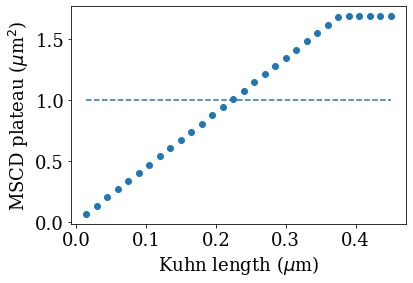

In [560]:
i_linker_kuhn = 0
count = 0
mscd_mu0 = np.zeros(n_kuhn * n_linker)
kuhn_length_mu0 = np.zeros(n_kuhn * n_linker)
linker_length_mu0 = np.zeros(n_kuhn * n_linker)
for i_linker in range(n_linker):
    linker_length = linker_length_series[i_linker]

    for i_kuhn in range(n_kuhn):
        kuhn_length = kuhn_length_series[i_kuhn]
        i_linker_kuhn = i_linker * n_mu + i_kuhn * n_linker * n_mu
        
        mscd_mu0[count] = mscd_biased[i_linker_kuhn]
        kuhn_length_mu0[count] = kuhn_length
        linker_length_mu0[count] = linker_length
        
        i_linker_kuhn += n_mu
        count += 1

i_linker = 0
i_linker_kuhn = i_linker * n_kuhn
i_0 = i_linker_kuhn
i_f = i_linker_kuhn + n_kuhn

kuhn_length_fit_ura = np.interp(plateau_exp_ura[0], mscd_mu0[i_0:i_f], kuhn_length_mu0[i_0:i_f])
kuhn_length_fit_spo = np.interp(plateau_exp_spo[0], mscd_mu0[i_0:i_f], kuhn_length_mu0[i_0:i_f])
kuhn_length_fit = np.mean([kuhn_length_fit_ura, kuhn_length_fit_spo])
mscd_fit_mu0 = np.interp(kuhn_length_fit, kuhn_length_mu0[i_0:i_f], mscd_mu0[i_0:i_f])
linker_length_fit = linker_length_mu0[i_0]

plt.scatter(kuhn_length_mu0[i_0:i_f], mscd_mu0[i_0:i_f])
plt.plot(kuhn_length_mu0[i_0:i_f], plateau_exp_spo[0]+ 0 *mscd_mu0[i_0:i_f],'--')

plt.xlabel('Kuhn length ($\mu$m)')
plt.ylabel('MSCD plateau ($\mu$m$^2$)') 

plt.savefig('meiosis-figures/mscd_kuhn.pdf', bbox_inches='tight')
plt.show()

Determine the fraction of cells in Rabl configuration based on the fitted Kuhn length and linker length. Evaluate the rate constant of centromere detachment

In [561]:
frac_rabl = np.minimum((plateau_exp_spo - nuc_radius ** 2) / (mscd_fit_mu0 - nuc_radius ** 2), np.ones(7))

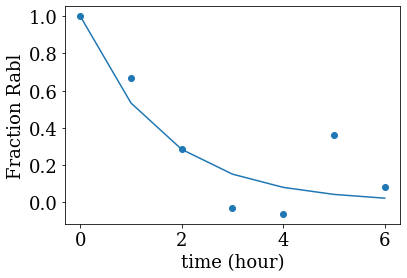

In [562]:
time_exp = np.linspace(0,6,7)
p_rabl = np.polyfit(time_exp[0:3], np.log(frac_rabl[0:3]),1)
k_rabl = -p_rabl[0]
#k_rabl = 1

plt.scatter(time_exp, frac_rabl)
plt.plot(time_exp, np.exp(-k_rabl * time_exp),'-')

plt.xlabel('time (hour)')
plt.ylabel('Fraction Rabl') 

plt.savefig('meiosis-figures/frac_rabl.pdf', bbox_inches='tight')
plt.show()

Evaluate the MSCD and biased MSCD at the fitted kuhn length and linker length

In [563]:
linker_length = linker_length_fit
kuhn_length = kuhn_length_fit

chr_size_bp = 576874
nucleo_length = 146
locus_position_bp = np.mean([116167, 116970])
cent_position_bp = np.mean([151987,152104])
#nuc_radius = 1.3
nuc_radius = 1.217

mus = np.linspace(0, 20, 101)
n_cells = 100000
radius_sq_cutoff = 0.250 ** 2

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
cent_position_kuhn = total_length_kuhn * cent_position_bp / chr_size_bp
label_loc_um = locus_position_kuhn * kuhn_length
cent_loc_um = cent_position_kuhn * kuhn_length
total_length_um = total_length_kuhn * kuhn_length

mscd_fit = np.zeros_like(mus)
mscd_fit_biased = np.zeros_like(mus)
mscd_rabl_fit = np.zeros_like(mus)
mscd_rabl_fit_biased = np.zeros_like(mus)
for i, mu in enumerate(mus):
    n_cells_biased = 0
    n_cells_rabl_biased = 0    
    for j in range(n_cells):
        cell = poly_dyn.generate_example_cell(mu, total_length_um)
        mscd_plateau_cell = poly_dyn.model_plateau(
            cell, label_loc_um, total_length_um, nuc_radius, kuhn_length)
        mscd_fit[i] += (1 / n_cells) * mscd_plateau_cell
        if mscd_plateau_cell > radius_sq_cutoff:
            n_cells_biased += 1
            mscd_fit_biased[i] += mscd_plateau_cell 
            
        cell = np.sort(np.append(cell, cent_loc_um))
        mscd_plateau_cell = poly_dyn.model_plateau(
            cell, label_loc_um, total_length_um, nuc_radius, kuhn_length)
        mscd_rabl_fit[i] += (1 / n_cells) * mscd_plateau_cell
        if mscd_plateau_cell > radius_sq_cutoff:
            n_cells_rabl_biased += 1
            mscd_rabl_fit_biased[i] += mscd_plateau_cell
    mscd_rabl_fit_biased[i] /= n_cells_rabl_biased
    mscd_fit_biased[i] /= n_cells_biased

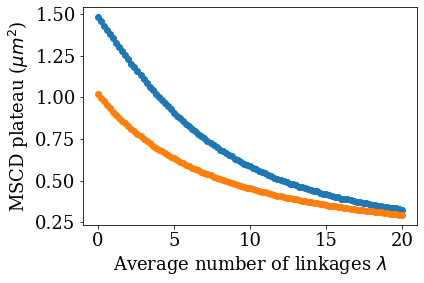

15.0

In [564]:
plt.scatter(mus, mscd_fit_biased)
plt.scatter(mus, mscd_rabl_fit_biased)

plt.xlabel('Average number of linkages $\lambda$')
plt.ylabel('MSCD plateau ($\mu{}m^2$)') 

plt.show()
linker_length_fit

Evaluate the average number of linkages by fitting the ura3 data

In [565]:
plateau_exp_ura = np.array([1.041056, 1.260354, 1.439587, 1.480568, 1.351417, 1.097409])
plateau_exp_spo = np.array([0.999832, 1.173121, 1.349847, 1.494605, 1.509391, 1.314366, 1.441702])

time_exp = np.linspace(0,6,7)
mu_fit_ura = np.zeros(7)
mscd_fit_ura = np.zeros(7)
mscd_fit_spo = np.zeros(7)
for i_exp in range(len(plateau_exp_ura)):
    frac_rabl = np.exp(-k_rabl * time_exp[i_exp])
    mscd_combo_fit_biased = frac_rabl * mscd_rabl_fit_biased + (1 - frac_rabl) * mscd_fit_biased
    mu_fit_ura[i_exp] = np.interp(plateau_exp_ura[i_exp], np.flipud(mscd_combo_fit_biased), np.flipud(mus))
    
    mscd_fit_ura[i_exp] = np.interp(mu_fit_ura[i_exp], mus, mscd_combo_fit_biased)
    mscd_fit_spo[i_exp] = mscd_combo_fit_biased[0]

i_exp = 6
frac_rabl = np.exp(-k_rabl * time_exp[i_exp])
mscd_combo_fit_biased = frac_rabl * mscd_rabl_fit_biased + (1 - frac_rabl) * mscd_fit_biased
mscd_fit_spo[i_exp] = mscd_combo_fit_biased[0]

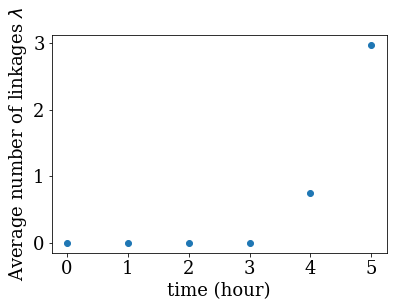

array([0.        , 0.        , 0.        , 0.        , 0.7452867 ,
       2.97308759, 0.        ])

In [566]:
plt.scatter(time_exp[0:6], mu_fit_ura[0:6])

plt.ylabel('Average number of linkages $\lambda$')
plt.xlabel('time (hour)')

plt.savefig('meiosis-figures/ave_link.pdf', bbox_inches='tight')
plt.show()

mu_fit_ura

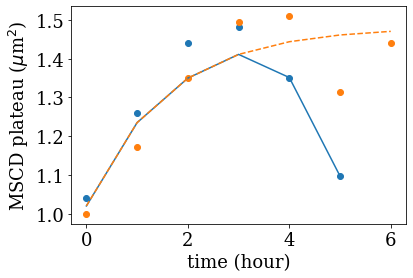

In [567]:
plt.figure()
plt.plot(time_exp[0:6], mscd_fit_ura[0:6],'-')
plt.plot(time_exp, mscd_fit_spo,'--')
plt.scatter(time_exp[0:6], plateau_exp_ura)
plt.scatter(time_exp, plateau_exp_spo)

plt.ylabel('MSCD plateau ($\mu$m$^2$)') 
plt.xlabel('time (hour)')

plt.savefig('meiosis-figures/mscd_fit.pdf', bbox_inches='tight')
plt.show()



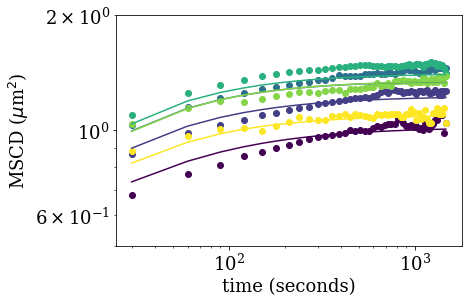

In [568]:
msds_file = Path('meiosis-figures/msds_dvel_unp.csv')
strain=('URA3', 'WT')
if not msds_file.exists():
    burgess.msds.precompute_msds()
mscds = pd.read_csv(msds_file) \
    .set_index(['locus', 'genotype', 'meiosis'])

d = mscds.loc[strain]

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes

ax.set_yscale('log')
ax.set_xscale('log')

## draw all the MSCDs
thick_lines = [0, 3, 6] if strain == ('URA3', 'SP') else [0, 3, 5]
lines = {}
i_exp = 0
for meiosis, data in d.groupby('meiosis'):
    t = -1 if meiosis[1] == 'a' else int(meiosis[1])
    data = data[data['delta'] > 0]
    zorder = 1.5 if t < 0 else 2  # 2 is default
    linewidth = 2 if t in thick_lines else 1
    alpha = 0.8 if t < 0 else 1
#    lines[meiosis] = ax.errorbar(data['delta'], data['mean'], data['ste'], 
#                                 zorder=zorder,
#                                 alpha=alpha, lw=linewidth)
    
    time = np.zeros(len(data['delta']))
    mscd_exp = np.zeros(len(data['mean']))
    for i in range(len(time)):
        time[i] = data['delta'][i]
        mscd_exp[i] = data['mean'][i]        
    color_ratio = i_exp / (len(plateau_exp_ura)-1)
    i_exp += 1
    if i_exp < 7:
        plt.loglog(time, mscd_exp,'o', c=viridis(color_ratio))

linker_length = linker_length_fit
kuhn_length = kuhn_length_fit

chr_size_bp = 576874
nucleo_length = 146
locus_position_bp = np.mean([116167, 116970])
cent_position_bp = np.mean([151987,152104])
#nuc_radius = 1.3
nuc_radius = 1.217
d0 = 0.09

n_cells = 5000
radius_sq_cutoff = 0.250 ** 2

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
cent_position_kuhn = total_length_kuhn * cent_position_bp / chr_size_bp
label_loc_um = locus_position_kuhn * kuhn_length
cent_loc_um = cent_position_kuhn * kuhn_length
total_length_um = total_length_kuhn * kuhn_length

for i_exp in range(len(plateau_exp_ura)):
    mscd_theory = np.zeros(len(time))
    mscd_theory_exp_d = np.zeros(len(time))

    frac_rabl = np.exp(-k_rabl * time_exp[i_exp])
    mu = mu_fit_ura[i_exp]
    n_cell_biased = 0
    for i_cell in range(n_cells):
        cell = poly_dyn.generate_example_cell(mu, total_length_um)
        if np.random.uniform() < frac_rabl:
            cell = np.sort(np.append(cell, cent_loc_um))
        d_cell = d0 * np.random.exponential() 
        mscd_plateau_cell = poly_dyn.model_plateau(
            cell, label_loc_um, total_length_um, nuc_radius, kuhn_length)
        if mscd_plateau_cell > radius_sq_cutoff:
            mscd_theory_exp_d += poly_dyn.model_mscd(
                time, cell, label_loc_um, 
                total_length_um,
                nuc_radius, kuhn_length, d_cell, num_modes=10000)
            n_cell_biased += 1
    
    mscd_theory_exp_d /= n_cell_biased
    color_ratio = i_exp / (len(plateau_exp_ura)-1)
    plt.loglog(time, mscd_theory_exp_d,'-',c=viridis(color_ratio))
    
    
csfont = {'fontname':'Times New Roman'}

ax.set_ylim([0.5, 2])
#    ax.set_ylim([10 ** -1, 10 ** 1])    
#    ax.set_ylim([10 ** -1, 2])    
#ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1, 2])
#ax.set_yticklabels([r"$5\times{}10^{-1}$", "", "", "", "", "$10^0$", r"$2\times10^{0}$"],**csfont)
        
plt.ylabel('MSCD ($\mu$m$^2$)')
plt.xlabel('time (seconds)')

plt.savefig('meiosis-figures/mscd_dyn_1p217.pdf', bbox_inches='tight')
plt.show()

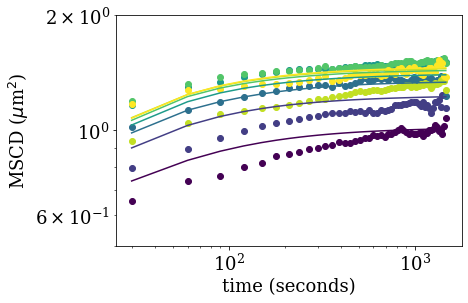

In [569]:
msds_file = Path('meiosis-figures/msds_dvel_unp.csv')
strain=('URA3', 'SP')
if not msds_file.exists():
    burgess.msds.precompute_msds()
mscds = pd.read_csv(msds_file) \
    .set_index(['locus', 'genotype', 'meiosis'])

d = mscds.loc[strain]

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes

ax.set_yscale('log')
ax.set_xscale('log')

## draw all the MSCDs
thick_lines = [0, 3, 6] if strain == ('URA3', 'SP') else [0, 3, 5]
lines = {}
i_exp = 0
for meiosis, data in d.groupby('meiosis'):
    t = -1 if meiosis[1] == 'a' else int(meiosis[1])
    data = data[data['delta'] > 0]
    zorder = 1.5 if t < 0 else 2  # 2 is default
    linewidth = 2 if t in thick_lines else 1
    alpha = 0.8 if t < 0 else 1
#    lines[meiosis] = ax.errorbar(data['delta'], data['mean'], data['ste'], 
#                                 zorder=zorder,
#                                 alpha=alpha, lw=linewidth)
    
    if i_exp < 7:
        time = np.zeros(len(data['delta']))
        mscd_exp = np.zeros(len(data['mean']))
        for i in range(len(time)):
            time[i] = data['delta'][i]
            mscd_exp[i] = data['mean'][i]        
        color_ratio = i_exp / (len(plateau_exp_spo)-1)
        i_exp += 1
        plt.loglog(time, mscd_exp,'o', c=viridis(color_ratio))

linker_length = linker_length_fit
kuhn_length = kuhn_length_fit

chr_size_bp = 576874
nucleo_length = 146
locus_position_bp = np.mean([116167, 116970])
cent_position_bp = np.mean([151987,152104])
#nuc_radius = 1.3
nuc_radius = 1.217
d0 = 0.09

n_cells = 5000
radius_sq_cutoff = 0.250 ** 2

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
cent_position_kuhn = total_length_kuhn * cent_position_bp / chr_size_bp
label_loc_um = locus_position_kuhn * kuhn_length
cent_loc_um = cent_position_kuhn * kuhn_length
total_length_um = total_length_kuhn * kuhn_length

for i_exp in range(len(plateau_exp_spo)):
    mscd_theory = np.zeros(len(time))
    mscd_theory_exp_d = np.zeros(len(time))

    frac_rabl = np.exp(-k_rabl * time_exp[i_exp])
    mu = 0
    n_cell_biased = 0
    for i_cell in range(n_cells):
        cell = poly_dyn.generate_example_cell(mu, total_length_um)
        if np.random.uniform() < frac_rabl:
            cell = np.sort(np.append(cell, cent_loc_um))
        d_cell = d0 * np.random.exponential() 
        mscd_plateau_cell = poly_dyn.model_plateau(
            cell, label_loc_um, total_length_um, nuc_radius, kuhn_length)
        if mscd_plateau_cell > radius_sq_cutoff:
            mscd_theory_exp_d += poly_dyn.model_mscd(
                time, cell, label_loc_um, 
                total_length_um,
                nuc_radius, kuhn_length, d_cell, num_modes=10000)
            n_cell_biased += 1
    
    mscd_theory_exp_d /= n_cell_biased
    color_ratio = i_exp / (len(plateau_exp_spo)-1)
    plt.loglog(time, mscd_theory_exp_d,'-',c=viridis(color_ratio))
    
ax.set_ylim([0.5, 2])
#    ax.set_ylim([10 ** -1, 10 ** 1])    
#    ax.set_ylim([10 ** -1, 2])    
#ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1, 2])
#ax.set_yticklabels([r"$5\times{}10^{-1}$", "", "", "", "", "$10^0$", r"$2\times10^{0}$"])
        
plt.ylabel('MSCD ($\mu$m$^2$)')
plt.xlabel('time (seconds)')

plt.savefig('meiosis-figures/mscd_spo_dyn_1p217.pdf', bbox_inches='tight')
plt.show()

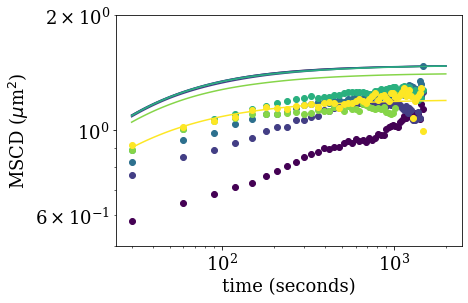

In [570]:
msds_file = Path('meiosis-figures/msds_dvel_unp.csv')
strain=('LYS2', 'WT')
if not msds_file.exists():
    burgess.msds.precompute_msds()
mscds = pd.read_csv(msds_file) \
    .set_index(['locus', 'genotype', 'meiosis'])

d = mscds.loc[strain]

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes

ax.set_yscale('log')
ax.set_xscale('log')

## draw all the MSCDs
thick_lines = [0, 3, 6] if strain == ('URA3', 'SP') else [0, 3, 5]
lines = {}
i_exp = 0
for meiosis, data in d.groupby('meiosis'):
    t = -1 if meiosis[1] == 'a' else int(meiosis[1])
    data = data[data['delta'] > 0]
    zorder = 1.5 if t < 0 else 2  # 2 is default
    linewidth = 2 if t in thick_lines else 1
    alpha = 0.8 if t < 0 else 1
#    lines[meiosis] = ax.errorbar(data['delta'], data['mean'], data['ste'], 
#                                 zorder=zorder,
#                                 alpha=alpha, lw=linewidth)
    
    time = np.zeros(len(data['delta']))
    mscd_exp = np.zeros(len(data['mean']))
    for i in range(len(time)):
        time[i] = data['delta'][i]
        mscd_exp[i] = data['mean'][i]        
    color_ratio = i_exp / (len(plateau_exp_ura)-1)
    i_exp += 1
    if i_exp < 7:
        plt.loglog(time, mscd_exp,'o', c=viridis(color_ratio))

linker_length = linker_length_fit
kuhn_length = kuhn_length_fit

chr_size_bp = 813184
nucleo_length = 146
locus_position_bp = np.mean([469748, 473926])
cent_position_bp = np.mean([238207, 238323])
#nuc_radius = 1.3
nuc_radius = 1.217
d0 = 0.09

n_cells = 5000
radius_sq_cutoff = 0.250 ** 2

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
cent_position_kuhn = total_length_kuhn * cent_position_bp / chr_size_bp
label_loc_um = locus_position_kuhn * kuhn_length
cent_loc_um = cent_position_kuhn * kuhn_length
total_length_um = total_length_kuhn * kuhn_length

time = np.logspace(np.log10(30), np.log10(2000), 100)

for i_exp in range(len(plateau_exp_ura)):
    mscd_theory = np.zeros(len(time))
    mscd_theory_exp_d = np.zeros(len(time))

    frac_rabl = np.exp(-k_rabl * time_exp[i_exp])
    mu = mu_fit_ura[i_exp]
    n_cell_biased = 0
    for i_cell in range(n_cells):
        cell = poly_dyn.generate_example_cell(mu, total_length_um)
        if np.random.uniform() < frac_rabl:
            cell = np.sort(np.append(cell, cent_loc_um))
        d_cell = d0 * np.random.exponential() 
        mscd_plateau_cell = poly_dyn.model_plateau(
            cell, label_loc_um, total_length_um, nuc_radius, kuhn_length)
        if mscd_plateau_cell > radius_sq_cutoff:
            mscd_theory_exp_d += poly_dyn.model_mscd(
                time, cell, label_loc_um, 
                total_length_um,
                nuc_radius, kuhn_length, d_cell, num_modes=10000)
            n_cell_biased += 1
    
    mscd_theory_exp_d /= n_cell_biased
    color_ratio = i_exp / (len(plateau_exp_ura)-1)
    plt.loglog(time, mscd_theory_exp_d,'-',c=viridis(color_ratio))
    
    
csfont = {'fontname':'Times New Roman'}

ax.set_ylim([0.5, 2])
#    ax.set_ylim([10 ** -1, 10 ** 1])    
#    ax.set_ylim([10 ** -1, 2])    
#ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1, 2])
#ax.set_yticklabels([r"$5\times{}10^{-1}$", "", "", "", "", "$10^0$", r"$2\times10^{0}$"],**csfont)
        
plt.ylabel('MSCD ($\mu$m$^2$)')
plt.xlabel('time (seconds)')

plt.savefig('meiosis-figures/mscd_dyn_lys2_1p217.pdf', bbox_inches='tight')
plt.show()

Evaluation of the MSCD plateau versus the number of linkages (LYS2, chr. II, $b = 0.015 \mu m$)

In [19]:
chr_size_bp = 813184
linker_length = 15
nucleo_length = 146
d0 = 3.487
locus_position_bp = np.mean([469748, 473926])
kuhn_length = 0.015  # Kuhn length in um
nuc_radius = 1.3

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
label_loc_um = locus_position_kuhn * kuhn_length
total_length_um = total_length_kuhn * kuhn_length

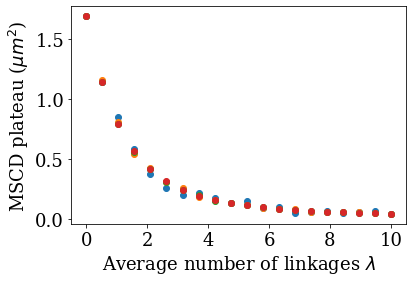

In [20]:
mus = np.linspace(0, 10, 20)
N_cells_vector = np.logspace(2,5,4).astype(int)
radius_sq_cutoff = 0.250 ** 2

plt.figure()
#ax.set_prop_cycle(color=['#aec7e8'])

for i_sample in range(len(N_cells_vector)):
    N_cells = N_cells_vector[i_sample]
    theory_plateaus = np.zeros_like(mus)
    theory_plateaus_biased = np.zeros_like(mus)
    for i, mu in enumerate(mus):
        N_cells_biased = 0
        for j in range(N_cells):
            cell = poly_dyn.generate_example_cell(mu, total_length_um)
            mscd_plateau_cell = poly_dyn.model_plateau(
                cell, label_loc_um, total_length_um, nuc_radius, kuhn_length)
            theory_plateaus[i] += (1 / N_cells) * mscd_plateau_cell
            if mscd_plateau_cell > radius_sq_cutoff:
                N_cells_biased += 1
                theory_plateaus_biased[i] += mscd_plateau_cell
        theory_plateaus_biased[i] /= N_cells_biased
    plt.scatter(mus, theory_plateaus)
#    plt.scatter(mus, theory_plateaus_biased)

plt.xlabel('Average number of linkages $\lambda$')
plt.ylabel('MSCD plateau ($\mu{}m^2$)') 

plt.show()

Evaluation of the MSCD plateau versus the number of linkages (comparison between URA3 and LYS2, $b = 0.015 \mu m$)

In [21]:
chr_size_bp = 813184
linker_length = 15
nucleo_length = 146
d0 = 3.487
locus_position_bp = np.mean([469748, 473926])
kuhn_length = 0.015  # Kuhn length in um
nuc_radius = 1.3

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
label_loc_um1 = locus_position_kuhn * kuhn_length
total_length_um1 = total_length_kuhn * kuhn_length

In [22]:
chr_size_bp = 576874
linker_length = 15
nucleo_length = 146
d0 = 3.487
locus_position_bp = np.mean([116167, 116970])
kuhn_length = 0.015  # Kuhn length in um
nuc_radius = 1.3

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
label_loc_um2 = locus_position_kuhn * kuhn_length
total_length_um2 = total_length_kuhn * kuhn_length

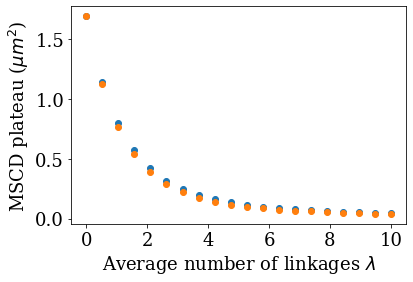

In [23]:
mus = np.linspace(0, 10, 20)
N_cells_vector = np.logspace(5,5,1).astype(int)
radius_sq_cutoff = 0.250 ** 2

plt.figure()
#ax.set_prop_cycle(color=['#aec7e8'])

for i_sample in range(len(N_cells_vector)):
    N_cells = N_cells_vector[i_sample]
    theory_plateaus1 = np.zeros_like(mus)
    theory_plateaus2 = np.zeros_like(mus)
    for i, mu in enumerate(mus):
        N_cells_biased = 0
        for j in range(N_cells):
            cell = poly_dyn.generate_example_cell(mu, total_length_um)
            mscd_plateau_cell1 = poly_dyn.model_plateau(
                cell, label_loc_um1, total_length_um1, nuc_radius, kuhn_length)
            theory_plateaus1[i] += (1 / N_cells) * mscd_plateau_cell1
            cell = poly_dyn.generate_example_cell(mu, total_length_um)
            mscd_plateau_cell2 = poly_dyn.model_plateau(
                cell, label_loc_um2, total_length_um2, nuc_radius, kuhn_length)
            theory_plateaus2[i] += (1 / N_cells) * mscd_plateau_cell2

    plt.scatter(mus, theory_plateaus1)
    plt.scatter(mus, theory_plateaus2)

plt.xlabel('Average number of linkages $\lambda$')
plt.ylabel('MSCD plateau ($\mu{}m^2$)') 

plt.show()

In [407]:
kuhn_length_fit

0.22700634545327358

In [409]:
1/k_rabl

2.782921297494479

Determine the best-fit value of the Kuhn length based on $T_{0}$ plateau values and assuming 60 bp linker length

In [453]:
npzfile = np.load('meiosis-figures/data/mscd_plateau_cent' + '.npz')
mscd = npzfile['mscd']
mscd_biased = npzfile['mscd_biased']
plateau_exp_ura = np.array([1.041056, 1.260354, 1.439587, 1.480568, 1.351417, 1.097409])
plateau_exp_spo = np.array([0.999832, 1.173121, 1.349847, 1.494605, 1.509391, 1.314366, 1.441702])

chr_size_bp = 576874
nucleo_length = 146
locus_position_bp = np.mean([116167, 116970])
cent_position_bp = np.mean([151987,152104])
nuc_radius = 1.3

n_mu = 101
mus = np.linspace(0, 20, n_mu)
n_cells = 10000
radius_sq_cutoff = 0.250 ** 2

kuhn_length_0 = 0.015
kuhn_length_f = 0.450
n_kuhn = 30
kuhn_length_series = np.linspace(kuhn_length_0, kuhn_length_f, n_kuhn)

linker_length_0 = 15
linker_length_f = 450
n_linker = 30
linker_length_series = np.linspace(linker_length_0, linker_length_f, n_linker)

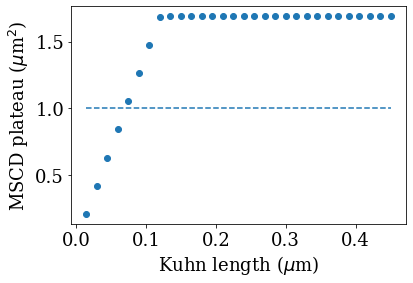

In [454]:
i_linker_kuhn = 0
count = 0
mscd_mu0 = np.zeros(n_kuhn * n_linker)
kuhn_length_mu0 = np.zeros(n_kuhn * n_linker)
linker_length_mu0 = np.zeros(n_kuhn * n_linker)
for i_linker in range(n_linker):
    linker_length = linker_length_series[i_linker]

    for i_kuhn in range(n_kuhn):
        kuhn_length = kuhn_length_series[i_kuhn]
        i_linker_kuhn = i_linker * n_mu + i_kuhn * n_linker * n_mu
        
        mscd_mu0[count] = mscd_biased[i_linker_kuhn]
        kuhn_length_mu0[count] = kuhn_length
        linker_length_mu0[count] = linker_length
        
        i_linker_kuhn += n_mu
        count += 1

i_linker = 3
i_linker_kuhn = i_linker * n_kuhn
i_0 = i_linker_kuhn
i_f = i_linker_kuhn + n_kuhn

kuhn_length_fit_ura = np.interp(plateau_exp_ura[0], mscd_mu0[i_0:i_f], kuhn_length_mu0[i_0:i_f])
kuhn_length_fit_spo = np.interp(plateau_exp_spo[0], mscd_mu0[i_0:i_f], kuhn_length_mu0[i_0:i_f])
kuhn_length_fit = np.mean([kuhn_length_fit_ura, kuhn_length_fit_spo])
mscd_fit_mu0 = np.interp(kuhn_length_fit, kuhn_length_mu0[i_0:i_f], mscd_mu0[i_0:i_f])
linker_length_fit = linker_length_mu0[i_0]

plt.scatter(kuhn_length_mu0[i_0:i_f], mscd_mu0[i_0:i_f])
plt.plot(kuhn_length_mu0[i_0:i_f], plateau_exp_spo[0]+ 0 *mscd_mu0[i_0:i_f],'--')

plt.xlabel('Kuhn length ($\mu$m)')
plt.ylabel('MSCD plateau ($\mu$m$^2$)') 

plt.savefig('meiosis-figures/mscd_kuhn_60.pdf', bbox_inches='tight')
plt.show()

Determine the fraction of cells in Rabl configuration based on the fitted Kuhn length and linker length. Evaluate the rate constant of centromere detachment

In [455]:
frac_rabl = np.minimum((plateau_exp_spo - nuc_radius ** 2) / (mscd_fit_mu0 - nuc_radius ** 2), np.ones(7))

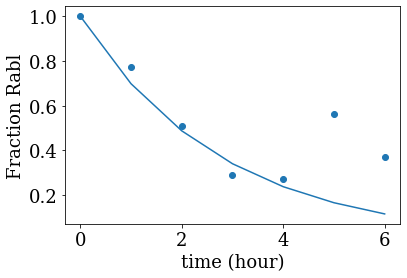

In [456]:
time_exp = np.linspace(0,6,7)
p_rabl = np.polyfit(time_exp[0:5], np.log(frac_rabl[0:5]),1)
k_rabl = -p_rabl[0]

plt.scatter(time_exp, frac_rabl)
plt.plot(time_exp, np.exp(-k_rabl * time_exp),'-')

plt.xlabel('time (hour)')
plt.ylabel('Fraction Rabl') 

plt.savefig('meiosis-figures/frac_rabl_60.pdf', bbox_inches='tight')
plt.show()

Evaluate the MSCD and biased MSCD at the fitted kuhn length and linker length

In [458]:
linker_length = linker_length_fit
kuhn_length = kuhn_length_fit

chr_size_bp = 576874
nucleo_length = 146
locus_position_bp = np.mean([116167, 116970])
cent_position_bp = np.mean([151987,152104])
nuc_radius = 1.3

mus = np.linspace(0, 20, 101)
n_cells = 100000
radius_sq_cutoff = 0.250 ** 2

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
cent_position_kuhn = total_length_kuhn * cent_position_bp / chr_size_bp
label_loc_um = locus_position_kuhn * kuhn_length
cent_loc_um = cent_position_kuhn * kuhn_length
total_length_um = total_length_kuhn * kuhn_length

mscd_fit = np.zeros_like(mus)
mscd_fit_biased = np.zeros_like(mus)
mscd_rabl_fit = np.zeros_like(mus)
mscd_rabl_fit_biased = np.zeros_like(mus)
for i, mu in enumerate(mus):
    n_cells_biased = 0
    n_cells_rabl_biased = 0    
    for j in range(n_cells):
        cell = poly_dyn.generate_example_cell(mu, total_length_um)
        mscd_plateau_cell = poly_dyn.model_plateau(
            cell, label_loc_um, total_length_um, nuc_radius, kuhn_length)
        mscd_fit[i] += (1 / n_cells) * mscd_plateau_cell
        if mscd_plateau_cell > radius_sq_cutoff:
            n_cells_biased += 1
            mscd_fit_biased[i] += mscd_plateau_cell 
            
        cell = np.sort(np.append(cell, cent_loc_um))
        mscd_plateau_cell = poly_dyn.model_plateau(
            cell, label_loc_um, total_length_um, nuc_radius, kuhn_length)
        mscd_rabl_fit[i] += (1 / n_cells) * mscd_plateau_cell
        if mscd_plateau_cell > radius_sq_cutoff:
            n_cells_rabl_biased += 1
            mscd_rabl_fit_biased[i] += mscd_plateau_cell
    mscd_rabl_fit_biased[i] /= n_cells_rabl_biased
    mscd_fit_biased[i] /= n_cells_biased

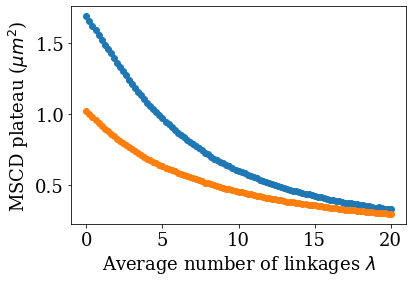

60.0

In [460]:
plt.scatter(mus, mscd_fit_biased)
plt.scatter(mus, mscd_rabl_fit_biased)

plt.xlabel('Average number of linkages $\lambda$')
plt.ylabel('MSCD plateau ($\mu{}m^2$)') 

plt.show()
linker_length_fit

Evaluate the average number of linkages by fitting the ura3 data

In [461]:
plateau_exp_ura = np.array([1.041056, 1.260354, 1.439587, 1.480568, 1.351417, 1.097409])
plateau_exp_spo = np.array([0.999832, 1.173121, 1.349847, 1.494605, 1.509391, 1.314366, 1.441702])

time_exp = np.linspace(0,6,7)
mu_fit_ura = np.zeros(7)
mscd_fit_ura = np.zeros(7)
mscd_fit_spo = np.zeros(7)
for i_exp in range(len(plateau_exp_ura)):
    frac_rabl = np.exp(-k_rabl * time_exp[i_exp])
    mscd_combo_fit_biased = frac_rabl * mscd_rabl_fit_biased + (1 - frac_rabl) * mscd_fit_biased
    mu_fit_ura[i_exp] = np.interp(plateau_exp_ura[i_exp], np.flipud(mscd_combo_fit_biased), np.flipud(mus))
    
    mscd_fit_ura[i_exp] = np.interp(mu_fit_ura[i_exp], mus, mscd_combo_fit_biased)
    mscd_fit_spo[i_exp] = mscd_combo_fit_biased[0]

i_exp = 6
frac_rabl = np.exp(-k_rabl * time_exp[i_exp])
mscd_combo_fit_biased = frac_rabl * mscd_rabl_fit_biased + (1 - frac_rabl) * mscd_fit_biased
mscd_fit_spo[i_exp] = mscd_combo_fit_biased[0]

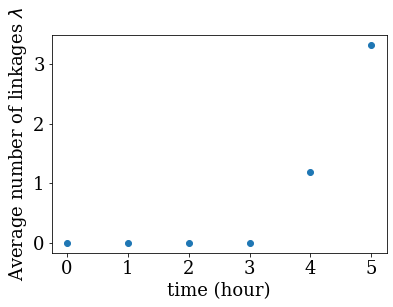

array([0.        , 0.        , 0.        , 0.        , 1.18187194,
       3.31259626, 0.        ])

In [465]:
plt.scatter(time_exp[0:6], mu_fit_ura[0:6])

plt.ylabel('Average number of linkages $\lambda$')
plt.xlabel('time (hour)')

plt.savefig('meiosis-figures/ave_link_60.pdf', bbox_inches='tight')
plt.show()

mu_fit_ura

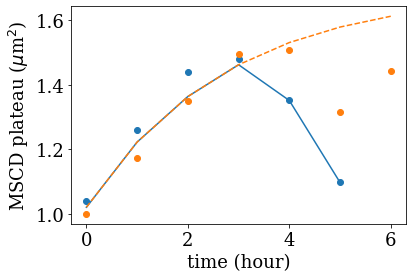

In [466]:
plt.figure()
plt.plot(time_exp[0:6], mscd_fit_ura[0:6],'-')
plt.plot(time_exp, mscd_fit_spo,'--')
plt.scatter(time_exp[0:6], plateau_exp_ura)
plt.scatter(time_exp, plateau_exp_spo)

plt.ylabel('MSCD plateau ($\mu$m$^2$)') 
plt.xlabel('time (hour)')

plt.savefig('meiosis-figures/mscd_fit_60.pdf', bbox_inches='tight')
plt.show()



In [464]:
print(kuhn_length_fit)

0.07261383099904617

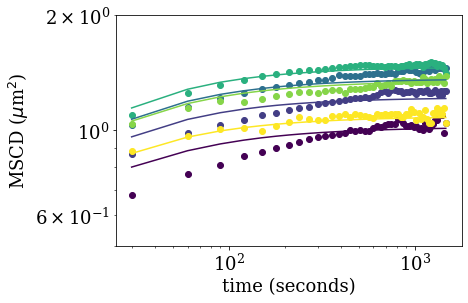

In [469]:
msds_file = Path('meiosis-figures/msds_dvel_unp.csv')
strain=('URA3', 'WT')
if not msds_file.exists():
    burgess.msds.precompute_msds()
mscds = pd.read_csv(msds_file) \
    .set_index(['locus', 'genotype', 'meiosis'])

d = mscds.loc[strain]

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes

ax.set_yscale('log')
ax.set_xscale('log')

## draw all the MSCDs
thick_lines = [0, 3, 6] if strain == ('URA3', 'SP') else [0, 3, 5]
lines = {}
i_exp = 0
for meiosis, data in d.groupby('meiosis'):
    t = -1 if meiosis[1] == 'a' else int(meiosis[1])
    data = data[data['delta'] > 0]
    zorder = 1.5 if t < 0 else 2  # 2 is default
    linewidth = 2 if t in thick_lines else 1
    alpha = 0.8 if t < 0 else 1
#    lines[meiosis] = ax.errorbar(data['delta'], data['mean'], data['ste'], 
#                                 zorder=zorder,
#                                 alpha=alpha, lw=linewidth)
    
    time = np.zeros(len(data['delta']))
    mscd_exp = np.zeros(len(data['mean']))
    for i in range(len(time)):
        time[i] = data['delta'][i]
        mscd_exp[i] = data['mean'][i]        
    color_ratio = i_exp / (len(plateau_exp_ura)-1)
    i_exp += 1
    if i_exp < 7:
        plt.loglog(time, mscd_exp,'o', c=viridis(color_ratio))

linker_length = linker_length_fit
kuhn_length = kuhn_length_fit

chr_size_bp = 576874
nucleo_length = 146
locus_position_bp = np.mean([116167, 116970])
cent_position_bp = np.mean([151987,152104])
nuc_radius = 1.3
d0 = 0.09 * 16

n_cells = 5000
radius_sq_cutoff = 0.250 ** 2

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
cent_position_kuhn = total_length_kuhn * cent_position_bp / chr_size_bp
label_loc_um = locus_position_kuhn * kuhn_length
cent_loc_um = cent_position_kuhn * kuhn_length
total_length_um = total_length_kuhn * kuhn_length

for i_exp in range(len(plateau_exp_ura)):
    mscd_theory = np.zeros(len(time))
    mscd_theory_exp_d = np.zeros(len(time))

    frac_rabl = np.exp(-k_rabl * time_exp[i_exp])
    mu = mu_fit_ura[i_exp]
    n_cell_biased = 0
    for i_cell in range(n_cells):
        cell = poly_dyn.generate_example_cell(mu, total_length_um)
        if np.random.uniform() < frac_rabl:
            cell = np.sort(np.append(cell, cent_loc_um))
        d_cell = d0 * np.random.exponential() 
        mscd_plateau_cell = poly_dyn.model_plateau(
            cell, label_loc_um, total_length_um, nuc_radius, kuhn_length)
        if mscd_plateau_cell > radius_sq_cutoff:
            mscd_theory_exp_d += poly_dyn.model_mscd(
                time, cell, label_loc_um, 
                total_length_um,
                nuc_radius, kuhn_length, d_cell, num_modes=10000)
            n_cell_biased += 1
    
    mscd_theory_exp_d /= n_cell_biased
    color_ratio = i_exp / (len(plateau_exp_ura)-1)
    plt.loglog(time, mscd_theory_exp_d,'-',c=viridis(color_ratio))
    
    
csfont = {'fontname':'Times New Roman'}

ax.set_ylim([0.5, 2])
#    ax.set_ylim([10 ** -1, 10 ** 1])    
#    ax.set_ylim([10 ** -1, 2])    
#ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1, 2])
#ax.set_yticklabels([r"$5\times{}10^{-1}$", "", "", "", "", "$10^0$", r"$2\times10^{0}$"],**csfont)
        
plt.ylabel('MSCD ($\mu$m$^2$)')
plt.xlabel('time (seconds)')

plt.savefig('meiosis-figures/mscd_dyn_60.pdf', bbox_inches='tight')
plt.show()

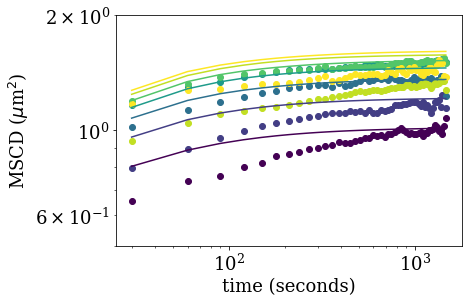

In [470]:
msds_file = Path('meiosis-figures/msds_dvel_unp.csv')
strain=('URA3', 'SP')
if not msds_file.exists():
    burgess.msds.precompute_msds()
mscds = pd.read_csv(msds_file) \
    .set_index(['locus', 'genotype', 'meiosis'])

d = mscds.loc[strain]

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes

ax.set_yscale('log')
ax.set_xscale('log')

## draw all the MSCDs
thick_lines = [0, 3, 6] if strain == ('URA3', 'SP') else [0, 3, 5]
lines = {}
i_exp = 0
for meiosis, data in d.groupby('meiosis'):
    t = -1 if meiosis[1] == 'a' else int(meiosis[1])
    data = data[data['delta'] > 0]
    zorder = 1.5 if t < 0 else 2  # 2 is default
    linewidth = 2 if t in thick_lines else 1
    alpha = 0.8 if t < 0 else 1
#    lines[meiosis] = ax.errorbar(data['delta'], data['mean'], data['ste'], 
#                                 zorder=zorder,
#                                 alpha=alpha, lw=linewidth)
    
    if i_exp < 7:
        time = np.zeros(len(data['delta']))
        mscd_exp = np.zeros(len(data['mean']))
        for i in range(len(time)):
            time[i] = data['delta'][i]
            mscd_exp[i] = data['mean'][i]        
        color_ratio = i_exp / (len(plateau_exp_spo)-1)
        i_exp += 1
        plt.loglog(time, mscd_exp,'o', c=viridis(color_ratio))

linker_length = linker_length_fit
kuhn_length = kuhn_length_fit

chr_size_bp = 576874
nucleo_length = 146
locus_position_bp = np.mean([116167, 116970])
cent_position_bp = np.mean([151987,152104])
nuc_radius = 1.3
d0 = 0.09 * 16

n_cells = 5000
radius_sq_cutoff = 0.250 ** 2

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
cent_position_kuhn = total_length_kuhn * cent_position_bp / chr_size_bp
label_loc_um = locus_position_kuhn * kuhn_length
cent_loc_um = cent_position_kuhn * kuhn_length
total_length_um = total_length_kuhn * kuhn_length

for i_exp in range(len(plateau_exp_spo)):
    mscd_theory = np.zeros(len(time))
    mscd_theory_exp_d = np.zeros(len(time))

    frac_rabl = np.exp(-k_rabl * time_exp[i_exp])
    mu = 0
    n_cell_biased = 0
    for i_cell in range(n_cells):
        cell = poly_dyn.generate_example_cell(mu, total_length_um)
        if np.random.uniform() < frac_rabl:
            cell = np.sort(np.append(cell, cent_loc_um))
        d_cell = d0 * np.random.exponential() 
        mscd_plateau_cell = poly_dyn.model_plateau(
            cell, label_loc_um, total_length_um, nuc_radius, kuhn_length)
        if mscd_plateau_cell > radius_sq_cutoff:
            mscd_theory_exp_d += poly_dyn.model_mscd(
                time, cell, label_loc_um, 
                total_length_um,
                nuc_radius, kuhn_length, d_cell, num_modes=10000)
            n_cell_biased += 1
    
    mscd_theory_exp_d /= n_cell_biased
    color_ratio = i_exp / (len(plateau_exp_spo)-1)
    plt.loglog(time, mscd_theory_exp_d,'-',c=viridis(color_ratio))
    
ax.set_ylim([0.5, 2])
#    ax.set_ylim([10 ** -1, 10 ** 1])    
#    ax.set_ylim([10 ** -1, 2])    
#ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1, 2])
#ax.set_yticklabels([r"$5\times{}10^{-1}$", "", "", "", "", "$10^0$", r"$2\times10^{0}$"])
        
plt.ylabel('MSCD ($\mu$m$^2$)')
plt.xlabel('time (seconds)')

plt.savefig('meiosis-figures/mscd_spo_dyn_60.pdf', bbox_inches='tight')
plt.show()

In [472]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [480]:
1e-8*450

4.5e-06